In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [248]:
df = pd.read_csv("leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [250]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [251]:
df.shape

(9240, 37)

## Missing Data

In [252]:
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Since there are no duplicate values, a heat map can give a high level visualization of which data is missing and how much of this data is missing

Text(0.5, 1, 'Amount of NaN Values')

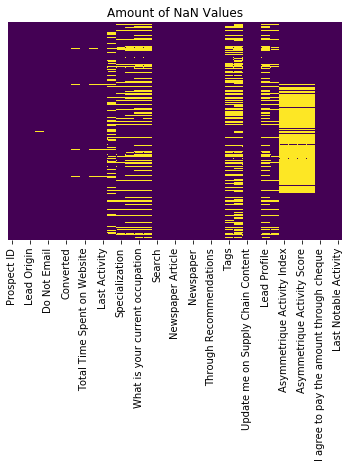

In [253]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.title("Amount of NaN Values")

In [254]:
def NaNValue(df): return df[df.isnull().any(axis=1)]
NaNValue(df).head(15)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,...,No,Select,Thane & Outskirts,02.Medium,01.High,14.0,17.0,No,Yes,Page Visited on Website
13,88867067-3750-4753-8d33-1c7d1db53b5e,660558,Landing Page Submission,Organic Search,No,No,0,5.0,170,5.00,...,No,Select,Thane & Outskirts,02.Medium,01.High,14.0,17.0,No,Yes,Email Opened
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,...,No,Select,Select,01.High,01.High,16.0,17.0,No,No,Email Bounced
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified


Values with 'Select' are ones that the user did not input. These 'select' values can be replaced into NaN because they are a missing value themselves.

In [255]:
df = df.replace('Select', np.nan)

In [256]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Looking at the heatmap, many of the values in 'Asymmetrique Profile Index', 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' are missing. It is safer to drop data that is missing too many values. We can get the percentage value of data that is missing for each column, and drop in column where more than 60% of the data is missing.

In [257]:
#df.isnull().sum()

NaN = (df.isnull().sum()/len(df.index)) * 100
NaN

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [258]:
#NaN = (df.isnull().sum()/len(df.index)) * 100

df2 = NaN[NaN > 50]
df2

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
dtype: float64

In [259]:
df = df.drop(['How did you hear about X Education','Lead Quality','Lead Profile'], axis=1)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Text(0.5, 1, 'Amount of NaN Values')

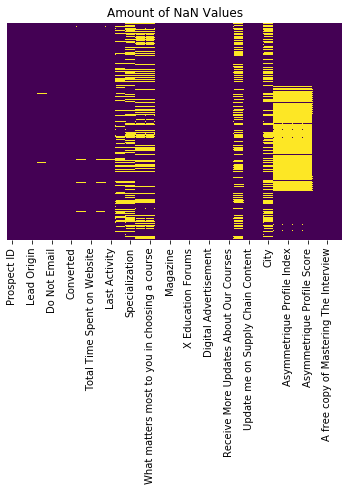

In [260]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.title("Amount of NaN Values")

In [261]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

We won't be needing to use this data, and since there are too many unknown values and no constant variable to replace it with, we can drop this.

In [262]:
#df['Lead Source'].describe()
print(df['Lead Source'].unique())
print(df['Asymmetrique Activity Index'].unique())
print(df['Asymmetrique Activity Score'].unique())
print(df['Asymmetrique Profile Index'].unique())
print(df['Asymmetrique Profile Score'].unique())

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
['02.Medium' '01.High' '03.Low' nan]
[15. 14. 13. 17. 16. 11. 12. 10.  9.  8. 18. nan  7.]
['02.Medium' '01.High' '03.Low' nan]
[15. 20. 17. 18. 14. 16. 13. 19. 12. nan 11.]


In [263]:
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [264]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

## Logistics Regression

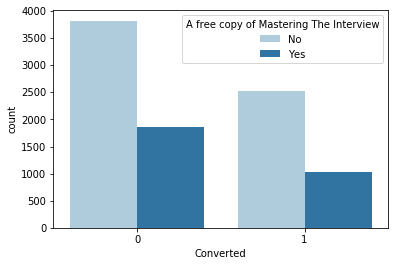

In [265]:
#sns.countplot(x='Survived', data=train, hue='Pclass', palette='Paired')
sns.countplot(x='Converted', data=df, hue='A free copy of Mastering The Interview', palette='Paired')

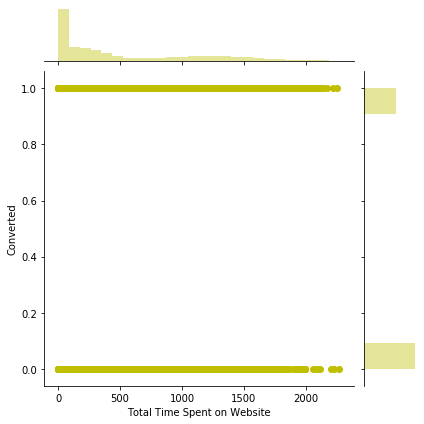

In [266]:
sns.jointplot(y='Converted', x='Total Time Spent on Website', data=df, color='y')

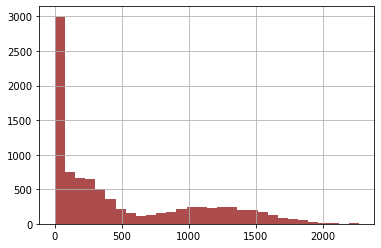

In [267]:
df['Total Time Spent on Website'].hist(bins=30,color='darkred',alpha=0.7)

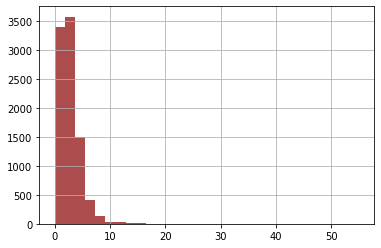

In [268]:
df['Page Views Per Visit'].hist(bins=30,color='darkred',alpha=0.7)

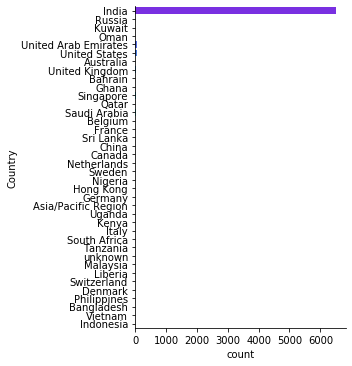

In [269]:
sns.catplot(data=df, y="Country", kind="count", palette='rainbow')

In [270]:
df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000


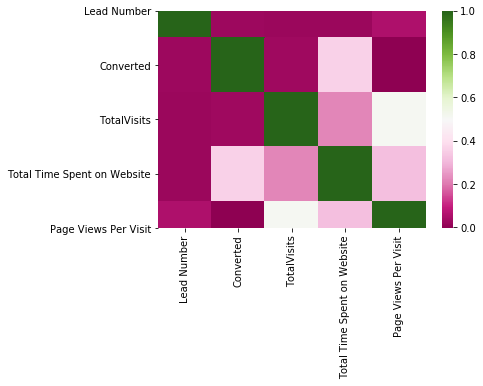

In [271]:
sns.heatmap(data=df.corr(), cmap="PiYG")

Turning values to numerical

In [272]:
DoNotEmail = pd.get_dummies(df['Do Not Email'], drop_first=True)
DoNotEmail.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [273]:
DoNotCall = pd.get_dummies(df['Do Not Call'], drop_first=True)
DoNotCall.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [274]:
df = pd.concat([df,DoNotEmail,DoNotCall], axis=1)
df.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Yes,Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Interested in other courses,No,No,NaN,No,No,Modified,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Ringing,No,No,NaN,No,No,Email Opened,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Ringing,No,No,Mumbai,No,No,Modified,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,No,No,NaN,No,No,Modified,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,No,No,NaN,No,No,Modified,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,NaN,No,No,Thane & Outskirts,No,Yes,Email Opened,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,NaN,No,No,Mumbai,No,No,Email Opened,0,0


In [288]:
print(df['Lead Origin'].unique(), '\n')
print(df['Lead Source'].unique(), '\n')
print(df['Do Not Email'].unique(), '\n')
print(df['Do Not Call'].unique(), '\n')

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

['No' 'Yes'] 

['No' 'Yes'] 



In [276]:
df['Lead Origin n'] = df['Lead Origin'].map({'API':0, 'Landing Page Submission':1, 'Lead Add Form':2, 'Lead Import':3,'Quick Add Form':4})

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


In [279]:
df['Lead Source n'] = df['Lead Source'].map({'Olark Chat':0, 'Organic Search':1, 'Direct Traffic':2, 'Google':3, 'Referral Sites':4, 'Welingak Website':5, 'Reference':6, 
'google':7, 'Facebook':8, 'blog':9, 'Pay per Click Ads':10, 'bing':11, 'Social Media':12, 'WeLearn':13, 'Click2call':14, 'Live Chat':15, 'welearnblog_Home':16, 'youtubechannel':17,
'testone':18, 'Press_Release':19, 'NC_EDM':20})

['No' 'Yes']


In [289]:
df['Do Not Email n'] = df['Do Not Email'].map({'No':0, 'Yes':1})

In [ ]:
df['Do Not Call n'] = df['Do Not Call'].map({'No':0, 'Yes':1})

These values are numerical so they can be kept as is.

In [287]:
print('TotalVisits:', df['TotalVisits'].unique(), '\n') 
print('Total Time Spent on Website:', df['Total Time Spent on Website'].unique(), '\n')
print('Page Views Per Visit:', df['Page Views Per Visit'].unique(), '\n')

TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 

Total Time Spent on Website: [   0  674 1532 ...  603  483  927] 

Page Views Per Visit: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.    2.6   4.75  1.27  3.25  5.33  2.57  2.17  2.75
  2.8   2.2   2.86  3.91  1.4   5.67  3.2   1.38  2.09  2.4  55.    5.25
  6.71  3.57  2.22  1.83  3.6   1.2   1.57  1.56  5.4   4.25  1.31  1.6
  2.9   1.23  1.78  3.83  7.5   1.14  2.71  1.45  2.38  1.86  2.29  1.21
 12.33  3.43  2.56  6.33  1.64  8.21  4.4   3.17  8.33  1.48  1.22 24.
  3.75  6.67  1.54  2.13  2.14  2.45  3.29  4.17  1.63  3.38  1.17 14.5
  3.8   1.19  3.82  2.83  1.93 11

[   0  674 1532 ...  603  483  927]


In [277]:
df['Lead Origin n'] = df['Lead Origin'].map({'API':0, 'Landing Page Submission':1, 'Lead Add Form':2, 'Lead Import':3,'Quick Add Form':4})

In [278]:
#split dataset in features and target variable. We only want to use this dataset for simplicity, the other dataset does not give us much information.
feature_cols = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X = df[feature_cols] # Features
y = df.Converted # Target variable